# Intro to Python
<div style='text-align: right;'> <a href='#NetCDF'>NetCDF</a> | [Time slices](#Time-slices) | [Multiple variables](#Multiple-variables) |[Multiple sites](#Multiple-sites) | [Using functions](#Using-functions)</div>

As a demo of the language, plot sin and cos on the same axis:

In [1]:
# load some key packages:
import numpy as np                #a numerical package
import pandas as pd               # a data analysis package
import matplotlib.pyplot as plt   # a plotting package

# to display the plots in the same document
%matplotlib inline

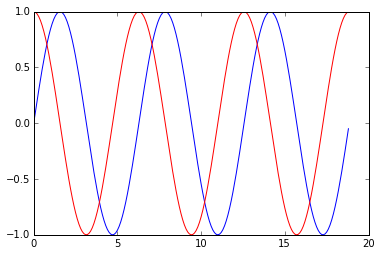

In [2]:
# define an array of points (start, end, by)
x = np.arange(0,6*np.pi,0.1)

# plot the sin of these points
plt.plot(x, np.sin(x), 'b')

# plot the cos of these points
plt.plot(x, np.cos(x),'r')

## NetCDF
<div style="float: right;">[NetCDF](#NetCDF) | [Time slices](#Time-slices) | [Multiple variables](#Multiple-variables) |[Multiple sites](#Multiple-sites) | [Using functions](#Using-functions)</div>

There are several different tools for working with netcdf data using python. This example focuses on xarray, because the time capabilities are really impressive. If you know the url of the dataset that you are interested in, you can display the info about that datset using **xarray.open_dataset(data_url)** and then printing the outcome. To work with the file, we will assign that dataset to a name -in this example we will use **ds**.

In [3]:
# load some the netcdf-handling package:
import xarray as xr

data_url = 'http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/butler.nc'
variable = 'AirTC_Avg'

ds = xr.open_dataset(data_url)

If you want to check out the names of the variables in this NetCDF file, you can run:

In [18]:
ds.data_vars.keys()

[u'AirTC_2_Avg', u'AirTC_Avg', u'Albedo_1_Avg', u'Albedo_Avg', u'CmCIR_Avg', u'CmGIR_Avg', u'DnTot_Avg', u'IR01DnCo_Avg', u'IR01Dn_Avg', u'IR01UpCo_Avg', u'IR01Up_Avg', u'LPO2Dn_Avg', u'Max_Run_Tot_mm_24hr_Max', u'Max_Run_Tot_mm_2hr_Max', u'NR01TC_Avg', u'NR01TK_Avg', u'NetRl_Avg', u'NetRs_Avg', u'NetTot_Avg', u'PA_uS', u'PA_uS_2', u'PA_uS_3', u'PA_uS_4', u'RECORD', u'RH', u'RHCroof', u'RH_2', u'Rain_mm_2_Tot', u'Rain_mm_3600_Tot', u'Rain_mm_3_Tot', u'Rain_mm_Tot', u'SBT_C_2_Avg', u'SBT_C_Avg', u'SR01Dn_Avg', u'SR01Up_Avg', u'Storm_Type_mm_24hr', u'Storm_Type_mm_2hr', u'T108_C_Avg_11', u'T108_C_Avg_12', u'T108_C_Avg_13', u'T108_C_Avg_14', u'T108_C_Avg_15', u'T108_C_Avg_16', u'T108_roof10_Avg', u'T108_roof1_Avg', u'T108_roof2_Avg', u'T108_roof3_Avg', u'T108_roof4_Avg', u'T108_roof5_Avg', u'T108_roof6_Avg', u'T108_roof7_Avg', u'T108_roof8_Avg', u'T108_roof9_Avg', u'TCAV_1_Avg', u'TCAV_2_Avg', u'TCAV_3_Avg', u'TCAV_4_Avg', u'TCroof_Avg', u'UpTot_Avg', u'VW', u'VW_2', u'VW_3', u'VW_4', u'W

At this point you haven't pulled over any actual data, you just have a way of referencing the dataset. To pull data we just select the part of the dataset that we are interested in. In this case AirTC_Avg.

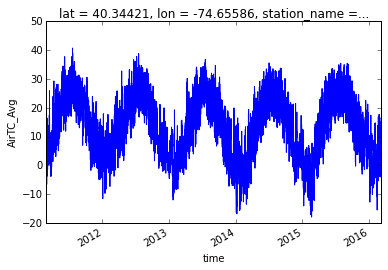

In [4]:
ds[variable].plot()

## Time slices
<div style="float: right;">[NetCDF](#NetCDF) | [Time slices](#Time-slices) | [Multiple variables](#Multiple-variables) |[Multiple sites](#Multiple-sites) | [Using functions](#Using-functions)</div>

We often are more interested in looking at one particular time, rather than the whole record. In xarray there are several different equivalent indexing techniques. Here is one:

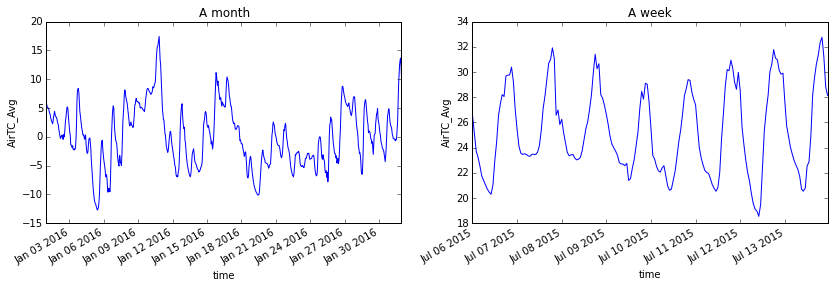

In [5]:
# slice the dataset or choose a date period (such as a month)
a_month = ds[variable].sel(time='2016-01')
a_week =  ds[variable].sel(time=slice('2015-07-06', '2015-07-13'))

# plot the slice
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(14,4))

a_month.plot(ax=axes[0])
axes[0].set_title('A month')

a_week.plot(ax=axes[1])
axes[1].set_title('A week')

plt.show()

## Multiple variables
<div style="float: right;">[NetCDF](#NetCDF) | [Time slices](#Time-slices) | [Multiple variables](#Multiple-variables) |[Multiple sites](#Multiple-sites) | [Using functions](#Using-functions)</div>

To plot several variables over a defined period of time, we can use a list of variables, and a slice of time to generate a pandas.DataFrame. Then we can drop the columns that contain info that we don't need.

In [6]:
# slice the dataset by time and grab variables of interest
vars_for_a_week = ds[['Rain_mm_3_Tot', 'VW']].sel(time=slice('2015-07-06', '2015-07-13'))

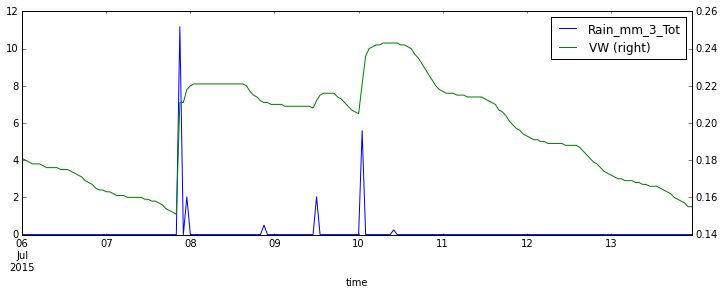

In [7]:
# convert to pandas.dataframe
df = vars_for_a_week.to_dataframe()

# drop columns that we aren't interested in 
df = df.drop(['lat','lon', 'station_name'], axis=1)

# plot
df.plot(secondary_y='VW', figsize=(12,4))
plt.show()

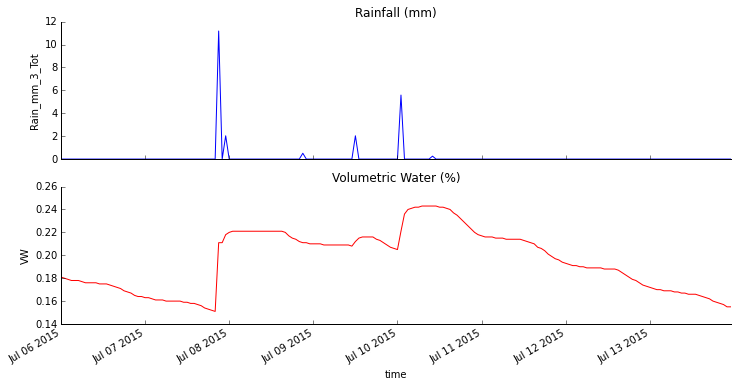

In [8]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12,6), sharex=True)
variables = ['Rain_mm_3_Tot', 'VW']
titles = ['Rainfall (mm)', 'Volumetric Water (%)']
colors = ['b','r']

for var, ax, title, c in zip(variables, axes, titles, colors):
    vars_for_a_week[var].plot(ax=ax, c=c)
    ax.set_title(title)

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

plt.show()

## Multiple sites
<div style="float: right;">[NetCDF](#NetCDF) | [Time slices](#Time-slices) | [Multiple variables](#Multiple-variables) |[Multiple sites](#Multiple-sites) | [Using functions](#Using-functions)</div>

There are numerous situations in which you can imagine wanting to combine data from multiple monitoring stations. This can be a bit tricky because the data are recorded at different frequencies. For instance: Butler records hourly data, and Uppper Washington Stream records 1minute data. In this example we combine water levels from upstream, downstream, and the lake, and compare these to rainfall from Broadmead.

In [ ]:
data_url = 'http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/broadmead.nc'
ds = xr.open_dataset(data_url)
broadmead_rain_ds = ds[['Rain_1_mm_Tot', 'Rain_2_mm_Tot']].sel(time=slice('2016-02-23', '2016-02-26'))
broadmead_rain = broadmead_rain_ds.to_dataframe().drop(['lat','lon','station_name'], axis=1)
ds.close()

In [15]:
data_url = 'http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/washington_lake.nc'
ds = xr.open_dataset(data_url)
washington_lake_level_ds = ds['Lvl_cm_Avg'].sel(time=slice('2016-02-23', '2016-02-26'))
washington_lake_level = washington_lake_level_ds.to_dataframe().drop(['lat','lon','station_name'], axis=1)
ds.close()

In [16]:
data_url = 'http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/washington_up.nc'
ds = xr.open_dataset(data_url)
washington_up_level_ds = ds['Corrected_cm_Avg'].sel(time=slice('2016-02-23', '2016-02-26'))
washington_up_level = washington_up_level_ds.to_dataframe().drop(['lat','lon','station_name'], axis=1)
ds.close()

In [17]:
data_url = 'http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/washington_down.nc'
ds = xr.open_dataset(data_url)
washington_down_level_ds = ds['Corrected_cm_Avg'].sel(time=slice('2016-02-23', '2016-02-26'))
washington_down_level = washington_down_level_ds.to_dataframe().drop(['lat','lon','station_name'], axis=1)
ds.close()

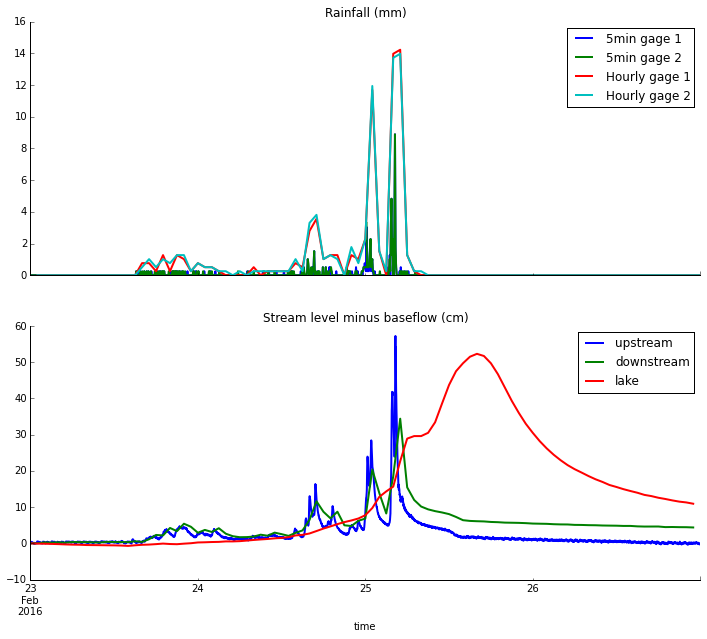

In [18]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12,10), sharex=True)

for ax in axes:
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

broadmead_rain.plot(ax=axes[0], linewidth=2)
broadmead_rain.resample('1H', how='sum', label='right').plot(ax=axes[0], linewidth=2)
axes[0].set_title('Rainfall (mm)')
axes[0].legend(['5min gage 1','5min gage 2', 'Hourly gage 1', 'Hourly gage 2'])

(washington_up_level-washington_up_level.iloc[0,0]).plot(ax=axes[1], linewidth=2)
(washington_down_level-washington_down_level.iloc[0,0]).plot(ax=axes[1], linewidth=2)
(washington_lake_level-washington_lake_level.iloc[0,0]).plot(ax=axes[1], linewidth=2)
axes[1].set_title('Stream level minus baseflow (cm)')
axes[1].legend(['upstream','downstream', 'lake'])
plt.savefig('Rain and discharge.png')
plt.show()

## Using functions
<div style="float: right;">[NetCDF](#NetCDF) | [Time slices](#Time-slices) | [Multiple variables](#Multiple-variables) |[Multiple sites](#Multiple-sites) | [Using functions](#Using-functions)</div>

You might have noticed that the way we pulled data from a multiple datasets was redundant. To simplify this process, we can write a quick function that can be used to pull from any site, any variable and setting your own start and end times. To show how this works, we will do the same exercise that we just did above, but in many fewer lines:

In [3]:
def select(site, var, start, end):
    import xarray as xr
    
    data_url = 'http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/'+ site+'.nc'
    ds = xr.open_dataset(data_url)
    _ds = ds[var].sel(time=slice(start, end))
    df = _ds.to_dataframe().drop(['lat','lon','station_name'], axis=1)
    ds.close()
    return df

Functions can be defined from the command line as we did above, but it is often more helpful to save them in files that we can use again and again. The above function is saved in a file called **select.py**. To load the function from there first make sure that you are in the same folder as **select.py**, then run:

In [4]:
from select import select

Then you are ready to start using the function. If you forget how it works, run: `select?` to see the documentation.

In [12]:
broadmead_rain = select('broadmead_1min', ['Rain_1_mm_Tot','Rain_2_mm_Tot'], '2016-02-23 12:00:00', '2016-02-26 11:00:00')
washington_lake = select('washington_lake', 'Lvl_cm_Avg', '2016-02-23 12:00:00', '2016-02-26 11:00:00')
washington_down = select('washington_down', 'Corrected_cm_Avg', '2016-02-23 12:00:00', '2016-02-26 11:00:00')
washington_up = select('washington_up', 'Corrected_cm_Avg', '2016-02-23 12:00:00', '2016-02-26 11:00:00')

In [29]:
broadmead_parsivel = select('broadmead_parsivel', 'rain_intensity', '2016-02-23 12:00:00', '2016-02-26 11:00:00')
par_1min = broadmead_parsivel.resample('1min', how='mean', label='right')

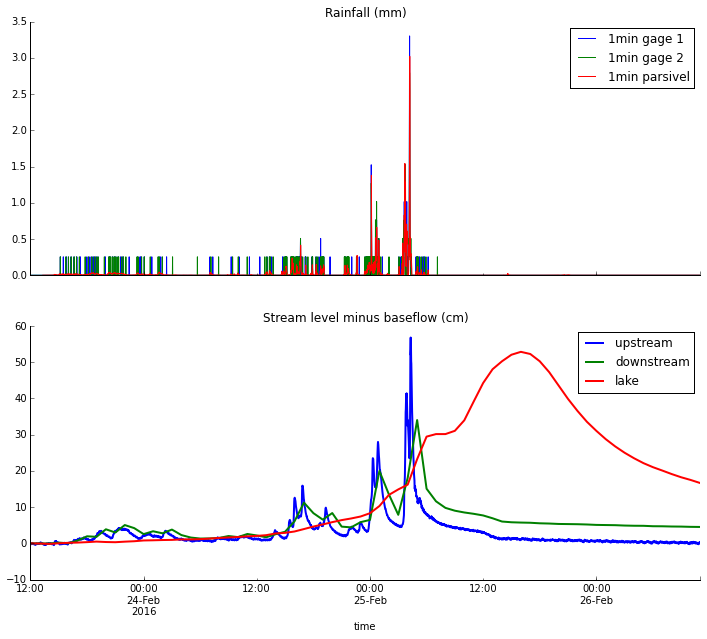

In [30]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12,10), sharex=True)

for ax in axes:
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

broadmead_rain.plot(ax=axes[0], linewidth=1)
(par_1min/60).plot(ax=axes[0], linewidth=1) 

axes[0].set_title('Rainfall (mm)')
axes[0].legend(['1min gage 1','1min gage 2','1min parsivel'])

(washington_up-washington_up.iloc[0,0]).plot(ax=axes[1], linewidth=2)
(washington_down-washington_down.iloc[0,0]).plot(ax=axes[1], linewidth=2)
(washington_lake-washington_lake.iloc[0,0]).plot(ax=axes[1], linewidth=2)
axes[1].set_title('Stream level minus baseflow (cm)')
axes[1].legend(['upstream','downstream', 'lake'])
plt.savefig('Rain and discharge.png')
plt.show()

## Rainy days

In [9]:
ds_wet_day = ds['Rain_mm_3_Tot'].resample('1D','time', how='sum', label='right')
wettest = ds_wet_day.to_pandas().sort_values(ascending=False)
wettest.head()

time
2011-08-29    187.442
2011-08-15    133.860
2014-05-01     70.614
2013-11-28     70.360
2011-07-04     65.534
dtype: float64

In [10]:
rainy_day = ds[['Rain_mm_3_Tot', 'VW']].sel(time=slice('2014-04-29', '2014-05-01'))

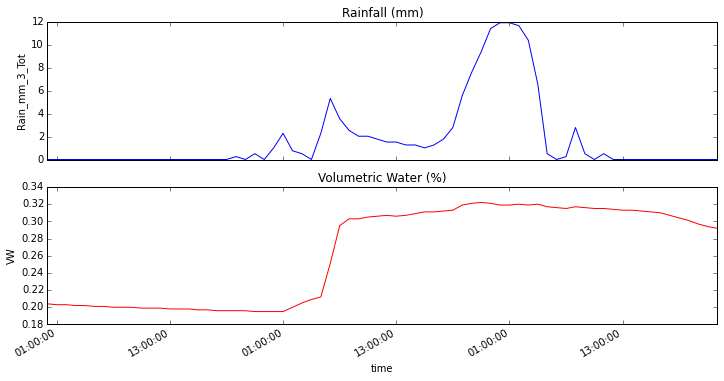

In [11]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12,6), sharex=True)

rainy_day['Rain_mm_3_Tot'].plot(ax=axes[0], c='b')
axes[0].set_title('Rainfall (mm)')

rainy_day['VW'].plot(ax=axes[1], c='r')
axes[1].set_title('Volumetric Water (%)')

plt.show()

## Rain on wet soil

In [12]:
rain_on_wet_soil = ds.where((ds['Rain_mm_3_Tot']>0) & (ds['VW']>.25) & (ds['AirTC_Avg']>10)).dropna('time')
df = rain_on_wet_soil[['Rain_mm_3_Tot', 'VW', 'AirTC_Avg']].to_dataframe()
df = df.drop(['lat', 'lon', 'station_name'], axis=1)
df.tail()

,Rain_mm_3_Tot,VW,AirTC_Avg
time,,,
2016-02-25 08:00:00,3.302,0.343,15.66
2016-02-25 09:00:00,2.032,0.342,14.75
2016-03-02 08:00:00,1.270,0.292,13.41
2016-03-02 09:00:00,2.794,0.307,12.61
2016-03-02 10:00:00,1.270,0.322,10.56


## Monthly rainfall

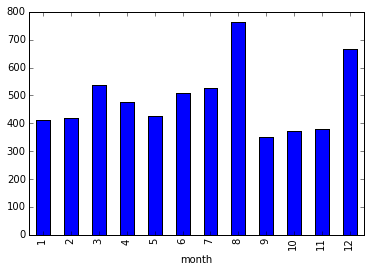

In [13]:
monthly_rainfall = ds['Rain_mm_3_Tot'].groupby('time.month').sum('time').to_pandas()
monthly_rainfall.plot.bar()